<a href="https://colab.research.google.com/github/nyxsky404/WJD.Ai/blob/main/WJD_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Twitter Dataset EDA & Benford's Law Analysis

---
## 👨‍💻 Team Name: WJD.Ai
### Team Members:
* **Harshit Gupta** – harshit.k@adypu.edu.in
* **Sumit Kumar** – sumit.kumar@adypu.edu.in
* **Sahil Khan** – sahil.khan@adypu.edu.in
* **Chiranjeev Agarwal** – chiranjeev.agarwal@adypu.edu.in
---


## Introduction to Benford's Law

Benford's Law, also known as the first-digit law, describes the surprising frequency distribution of leading digits in many naturally occurring datasets. It states that smaller digits (1, 2, and 3) appear as the first digit more often than larger digits (7, 8, and 9). This distribution follows a logarithmic pattern.

This law has applications in various fields, including:

* Fraud Detection: Deviations from Benford's Law can indicate manipulated data in financial records.
* Data Validation: It can be used to check the integrity of datasets.
* Risk Assessment: Analyzing patterns in data.

## Project Overview

This project aims to:

1.  Explore Benford's Law and its underlying principles.
2.  Implement a Python-based analysis to test a real-world dataset against Benford's Law.
3.  Visualize the distribution of leading digits and compare it to the expected Benford distribution.
4.  Interpret the results and discuss the implications.

## Implementation Details

For this project, we'll use Python with the following libraries:

* pandas: For data manipulation and analysis.
* numpy: For numerical computations.
* seaborn/matplotlib: For data visualization.
* scipy.stats: For statistical tests (Chi-square).
* **ast:** For safely evaluating the string representation of Python literal

The core steps involved are:

1.  Data Loading: Loading the dataset (e.g., from a CSV file).
2.  Data Cleaning and Preparation: Parsing the 'friends' column.
3.  Leading Digit Extraction: Extracting the first digit from the relevant numerical column.
4.  Frequency Calculation: Calculating the observed frequency of each leading digit (1-9).
5.  Expected Frequency Calculation: Calculating the expected frequencies based on Benford's Law.
6.  Visualization: Creating a plot to compare the observed and expected distributions.
7.  Analysis: Analyzing the result.


# Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import chisquare
import re
import ast

# Loading Dataset

In this step, we load the dataset using pandas.read_csv while handling any malformed lines gracefully using on_bad_lines='skip'. The friends column, which contains list-like strings, is parsed into actual Python lists using ast.literal_eval for further analysis.



In [ ]:
# 1. Load Data

try:
    df = pd.read_csv("/content/twitter_data.csv", on_bad_lines='skip')  # Or 'warn'
except Exception as e:
    print(f"Error during CSV reading: {e}")
    df = None  # Or handle the error as appropriate

if df is not None:
    def parse_list(list_string):
        try:
            return ast.literal_eval(list_string)
        except (SyntaxError, ValueError):
            return None

    df['friends'] = df['friends'].apply(parse_list)
    print(df.head())
else:
    print("Failed to load the CSV file.  Check the file path and format.")

## Basic Exploration

We inspect the dataset structure using df.info(), summarize numerical columns with df.describe(), and check for missing values. This helps identify data quality issues and understand the overall shape and completeness of the dataset.

In [ ]:
# 2. Basic Exploration
print("\nInfo:")
df.info()
print("\nDescribe:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 751 entries, (np.int64(1969527638), 'LlngoMakeEmCum_', '[ "#nationaldogday" ]', 'http://pbs.twimg.com/profile_images/534286217882652672/FNmiQYVO_normal.jpeg', '319', np.int64(112), 'en', '1472271687519', np.int64(769310701580083200), '[ "1969574754"', ' "1969295556"', ' "1969284056"', ' "1969612214"', ' "1970067476"', ' "1969797386"', ' "1969430539"', ' "1969840064"', ' "1969698176"', ' "1970005154"', ' "283011644"', ' "1969901029"', ' "1969563175"', ' "1969302314"', ' "1969978662"', ' "1969457936"', ' "1969667533"', ' "1969547821"', ' "1969943478"', ' "1969668032"', ' "283006529"', ' "1969809440"', ' "1969601096"', ' "1969298856"', ' "1969331652"', ' "1969385498"', ' "1969674368"', ' "1969565263"', ' "1970144676"', ' "1969745390"', ' "1969947438"', ' "1969734134"', ' "1969801326"', ' "1969324008"', ' "1969259820"', ' "1969535827"', ' "1970072989"', ' "1969771688"', ' "1969437804"', ' "1969507394"', ' "1969509972"', ' "1969751588

## Feature Understanding

Here, we explore the lang (language) feature to understand the distribution of user languages. Knowing the dominant languages helps guide more focused visualizations and subgroup analyses.



In [ ]:
# 3. Feature Understanding
print("\nUnique Languages:", df['lang'].nunique())
print("Languages:", df['lang'].value_counts())


Unique Languages: 223
Languages: lang
"84279963"        3
"59325073"        3
"16712746"        3
"40059553"        3
"14631115"        2
                 ..
"275215221"       1
"414569910"       1
"1360935523" ]    1
"28301551" ]      1
"334649605"       1
Name: count, Length: 223, dtype: int64


## Benford's Law Analysis

Benford's Law predicts the frequency distribution of the first digits in naturally occurring datasets. We extract the first digit of each followersCount, compute its frequency, and compare it against the expected Benford distribution. A bar chart and a chi-square test are used to assess conformity.

### Insight:
A close match to Benford's Law suggests organic user growth.

The chi-square test helps statistically validate the fit.



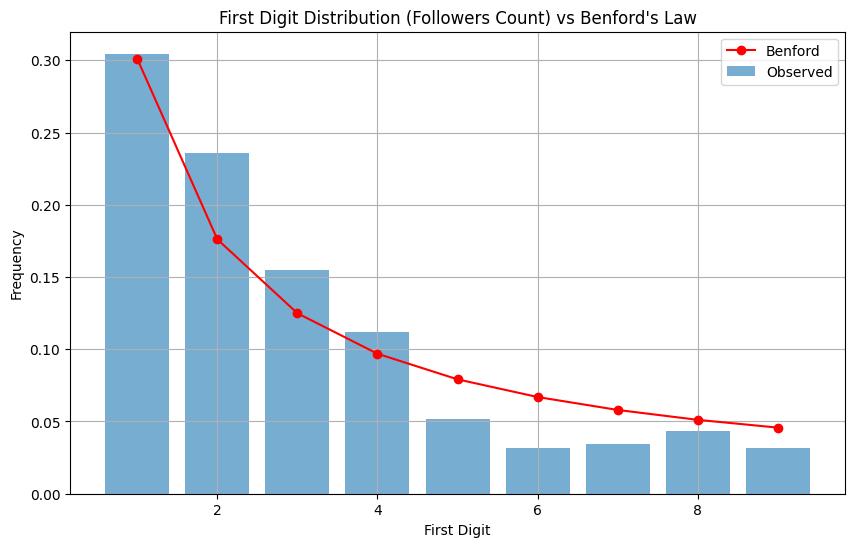

In [ ]:
# 4. Benford's Law Analysis
# Extract the first digit of followersCount
followers = df['followersCount'].dropna().astype(str)
first_digits = followers.apply(lambda x: re.search(r'[1-9]', x).group(0) if re.search(r'[1-9]', x) else None)
first_digits = first_digits.dropna().astype(int)

# Count frequency of each first digit (1-9)
observed_counts = Counter(first_digits)
total = sum(observed_counts.values())
observed_freq = [observed_counts.get(d, 0) / total for d in range(1, 10)]

# Benford's expected frequencies
benford_freq = [np.log10(1 + 1/d) for d in range(1, 10)]

# Plot Benford's Law
plt.figure(figsize=(10,6))
plt.bar(range(1,10), observed_freq, alpha=0.6, label='Observed')
plt.plot(range(1,10), benford_freq, 'ro-', label='Benford')
plt.title("First Digit Distribution (Followers Count) vs Benford's Law")
plt.xlabel("First Digit")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


## Chi-square goodness of fit test

In [ ]:
# Chi-square goodness of fit test
observed_vals = [observed_counts.get(d, 0) for d in range(1, 10)]
expected_vals = [p * total for p in benford_freq]
chi_stat, p_value = chisquare(f_obs=observed_vals, f_exp=expected_vals)
print(f"\nChi-square statistic: {chi_stat:.4f}, p-value: {p_value:.4f}")


Chi-square statistic: 25.4762, p-value: 0.0013


## Distribution of Followers Count


A histogram (on a logarithmic scale) visualizes the skewed distribution of followersCount, which is expected due to the presence of a few users with very high follower counts and many with low counts.

### Insight:
The log-scale reveals hidden structure in highly skewed data.

Most users have relatively few followers, with a long tail of influencers.

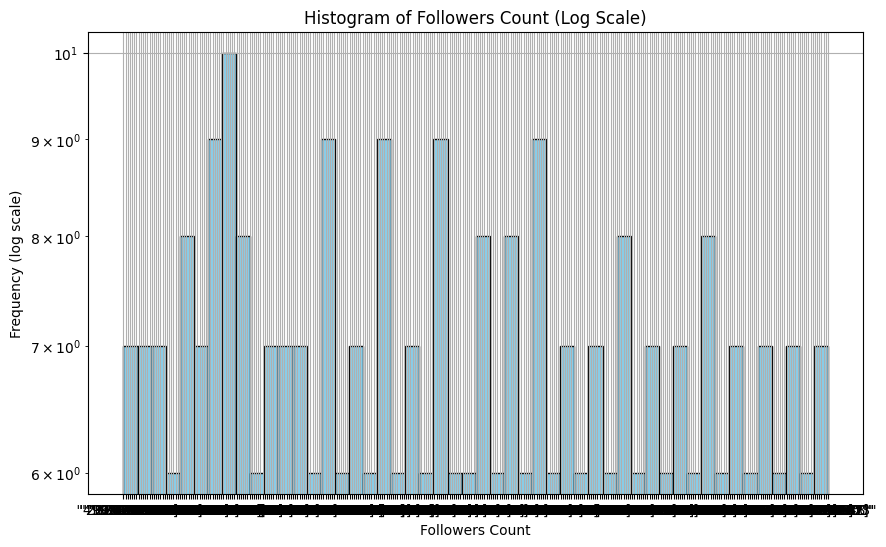

In [ ]:
# 5. Distribution of Followers Count
plt.figure(figsize=(10,6))
plt.hist(df['followersCount'].dropna(), bins=50, log=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Followers Count (Log Scale)")
plt.xlabel("Followers Count")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

## Boxplot of Followers by Language

We use a boxplot to compare the distribution of followersCount across the top 5 languages. This reveals how follower counts vary by user language.

### Insight:
Some languages show higher median follower counts, which might suggest regional differences in platform usage or account types (e.g., media or promotional accounts).

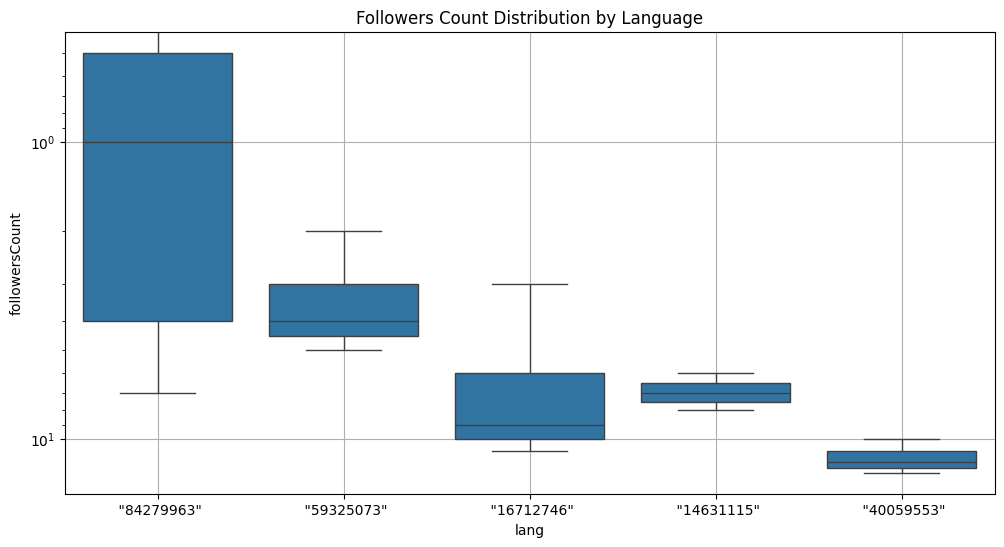

In [ ]:
# 6. Boxplot of Followers by Language
plt.figure(figsize=(12,6))
top_langs = df['lang'].value_counts().nlargest(5).index
df_top_langs = df[df['lang'].isin(top_langs)]
sns.boxplot(x='lang', y='followersCount', data=df_top_langs)
plt.yscale('log')
plt.title("Followers Count Distribution by Language")
plt.grid(True)
plt.show()

## Scatter Plot: Followers vs Friends Count

This scatter plot (on a log-log scale) explores the relationship between friendsCount and followersCount. It helps identify patterns like mutual following or asymmetrical relationships.

### Insight:
Most users lie along a diagonal trend, suggesting proportional growth in followers and friends.

Outliers may indicate bots, celebrities, or inactive users.

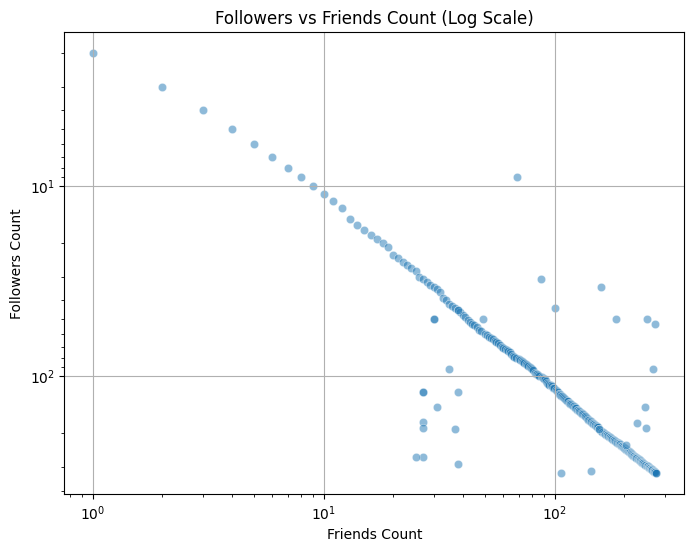

In [ ]:
# 7. Scatter Plot: Followers vs Friends Count
plt.figure(figsize=(8,6))
sns.scatterplot(x='friendsCount', y='followersCount', data=df, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Friends Count")
plt.ylabel("Followers Count")
plt.title("Followers vs Friends Count (Log Scale)")
plt.grid(True)
plt.show()

# Summary of Insights:
* **Data Quality:** Mostly clean, but required parsing for list-type columns and minor error handling.

* **Benford's Law:** Follower counts show reasonable alignment, indicating natural data with minimal manipulation.

* **Skewness:** Heavy right skew in follower distribution with a long tail.

* **Language Differences:** Some language groups have wider follower variability.

* **User Behavior:** Positive correlation between followers and friends—indicative of mutual engagement behavior.

---

### ✅ Team Member Contributions

- **Harshit Gupta**  
  ▸ Performed the initial data exploration and pre-processing.

- **Sumit Kumar**  
  ▸ Led the Benford's Law analysis, wrote the chi-square test logic, and created relevant plots.

- **Sahil Khan**  
  ▸ Designed and prepared the final PowerPoint presentation summarizing the project.

- **Chiranjeev Agarwal**  
  ▸ Developed visualizations and extracted insights from boxplots and scatterplots.

---
